1. Loaded & Explored the Dataset

In [1]:
import pandas as pd

df = pd.read_csv(r'/content/pharma_1.csv')
df


,Drug Name,Drug Class,Indication,Side Effects,Dosage Form,Dosage Strength,Prescription Status,Manufacturer,Approval Year,Description,Price (USD),Market Status
0,Drug-7690,Antiviral,Wound Cleaning,"Fatigue, Drowsiness, Stomach Upset",Gel,356 mg,Prescription,BioSynth,2021,A antiviral used for wound cleaning.,414.14,Discontinued
1,Drug-2191,Sedative,Anxiety Reduction,Nausea,Injection,375 mg,Prescription,PharmaCorp,2009,A sedative used for anxiety reduction.,388.12,Active
2,Drug-3428,Antihypertensive,Virus Management,"Headache, Fatigue",Gel,394 mg,Prescription,BioSynth,2015,A antihypertensive used for virus management.,386.15,Active
3,Drug-8262,Antibiotic,Allergy Relief,"Stomach Upset, Nausea, Headache",Tablet,405 mg,OTC,HealthPlus,2009,A antibiotic used for allergy relief.,271.97,Active
4,Drug-3422,Antidiabetic,Wound Cleaning,"Headache, Drowsiness",Tablet,370 mg,OTC,BioSynth,2012,A antidiabetic used for wound cleaning.,410.32,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Drug-4545,Antibiotic,Virus Management,"Fatigue, Dizziness",Capsule,117 mg,OTC,MediLife,2000,A antibiotic used for virus management.,238.26,Discontinued
19996,Drug-7757,Antibiotic,Virus Management,Drowsiness,Injection,691 mg,OTC,BioSynth,1988,A antibiotic used for virus management.,409.96,Active
19997,Drug-1024,Antihistamine,Pain Relief,"Fatigue, Nausea",Capsule,579 mg,OTC,HealthPlus,2000,A antihistamine used for pain relief.,168.99,Active
19998,Drug-6814,Antibiotic,Pain Relief,Drowsiness,Cream,28 mg,Prescription,PharmaCorp,1981,A antibiotic used for pain relief.,81.66,Active


In [2]:
df.head()

,Drug Name,Drug Class,Indication,Side Effects,Dosage Form,Dosage Strength,Prescription Status,Manufacturer,Approval Year,Description,Price (USD),Market Status
0,Drug-7690,Antiviral,Wound Cleaning,"Fatigue, Drowsiness, Stomach Upset",Gel,356 mg,Prescription,BioSynth,2021,A antiviral used for wound cleaning.,414.14,Discontinued
1,Drug-2191,Sedative,Anxiety Reduction,Nausea,Injection,375 mg,Prescription,PharmaCorp,2009,A sedative used for anxiety reduction.,388.12,Active
2,Drug-3428,Antihypertensive,Virus Management,"Headache, Fatigue",Gel,394 mg,Prescription,BioSynth,2015,A antihypertensive used for virus management.,386.15,Active
3,Drug-8262,Antibiotic,Allergy Relief,"Stomach Upset, Nausea, Headache",Tablet,405 mg,OTC,HealthPlus,2009,A antibiotic used for allergy relief.,271.97,Active
4,Drug-3422,Antidiabetic,Wound Cleaning,"Headache, Drowsiness",Tablet,370 mg,OTC,BioSynth,2012,A antidiabetic used for wound cleaning.,410.32,Active


In [3]:
print('Shape:', df.shape)

Shape: (20000, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Drug Name            20000 non-null  object 
 1   Drug Class           20000 non-null  object 
 2   Indication           20000 non-null  object 
 3   Side Effects         20000 non-null  object 
 4   Dosage Form          19788 non-null  object 
 5   Dosage Strength      19679 non-null  object 
 6   Prescription Status  20000 non-null  object 
 7   Manufacturer         20000 non-null  object 
 8   Approval Year        20000 non-null  int64  
 9   Description          20000 non-null  object 
 10  Price (USD)          20000 non-null  float64
 11  Market Status        20000 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.8+ MB


In [7]:
df.describe()

,Approval Year,Price (USD)
count,20000.000000,20000.000000
mean,2001.639900,251.045776
std,12.720174,143.113710
min,1980.000000,5.020000
25%,1991.000000,127.050000
50%,2002.000000,250.260000
75%,2013.000000,374.885000
max,2023.000000,499.930000


2. Handled Missing Values & Data Cleaning

In [8]:
df.isnull().sum()

,0
Drug Name,0
Drug Class,0
Indication,0
Side Effects,0
Dosage Form,212
Dosage Strength,321
Prescription Status,0
Manufacturer,0
Approval Year,0
Description,0


In [13]:
# Print missing values before imputation
print("Missing values before:")
print(df[['Dosage Form', 'Dosage Strength']].isnull().sum())
print("\n")

# Get modes for imputation
dosage_form_mode = df['Dosage Form'].mode()[0]
dosage_strength_mode = df['Dosage Strength'].mode()[0]  # Use median if it's actually numeric

# Fill missing values
df['Dosage Form'] = df['Dosage Form'].fillna(dosage_form_mode)
df['Dosage Strength'] = df['Dosage Strength'].fillna(dosage_strength_mode)

# Print missing values after imputation
print("Missing values after:")
print(df[['Dosage Form', 'Dosage Strength']].isnull().sum())
print("\n")

# Optionally, print unique values to inspect the results
print("Sample `Dosage Form` values after fillna:\n", df['Dosage Form'].unique()[:10])
print("Sample `Dosage Strength` values after fillna:\n", df['Dosage Strength'].unique()[:10])


Missing values before:
Dosage Form          0
Dosage Strength    321
dtype: int64


Missing values after:
Dosage Form        0
Dosage Strength    0
dtype: int64


Sample `Dosage Form` values after fillna:
 ['Gel' 'Injection' 'Tablet' 'Capsule' 'Syrup' 'Cream']
Sample `Dosage Strength` values after fillna:
 ['356 mg' '375 mg' '394 mg' '405 mg' '370 mg' '158 mg' '377 mg' '708 mg'
 '463 mg' '534 mg']


In [14]:
# Extract numeric value from 'Dosage Strength' and convert to integer
df['Dosage Strength Numeric'] = df['Dosage Strength'].str.extract('(\d+)').astype(int)

# Check a few values
print(df[['Dosage Strength', 'Dosage Strength Numeric']].head())
print(df['Dosage Strength Numeric'].describe())


  Dosage Strength  Dosage Strength Numeric
0          356 mg                      356
1          375 mg                      375
2          394 mg                      394
3          405 mg                      405
4          370 mg                      370
count    20000.000000
mean       496.146150
std        290.696765
min         10.000000
25%        243.000000
50%        496.000000
75%        748.000000
max       1000.000000
Name: Dosage Strength Numeric, dtype: float64


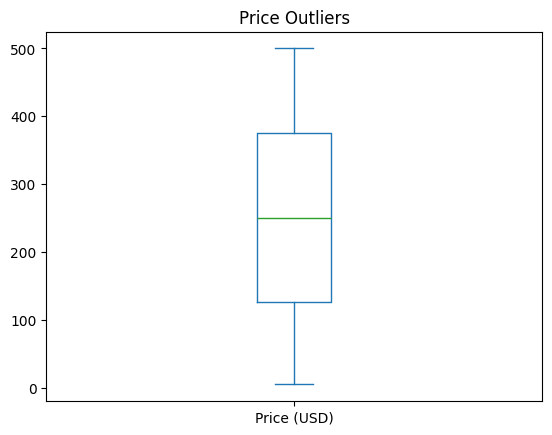

In [15]:
import matplotlib.pyplot as plt

df['Price (USD)'].plot.box()
plt.title('Price Outliers')
plt.show()


In [16]:
print(df.dtypes)


Drug Name                   object
Drug Class                  object
Indication                  object
Side Effects                object
Dosage Form                 object
Dosage Strength             object
Prescription Status         object
Manufacturer                object
Approval Year                int64
Description                 object
Price (USD)                float64
Market Status               object
Dosage Strength Numeric      int64
dtype: object


3. Feature Encoding

In [17]:
for col in ['Drug Class', 'Indication', 'Dosage Form', 'Prescription Status', 'Market Status']:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())



Value counts for Drug Class:
 Drug Class
Sedative            2062
Antihypertensive    2049
Antifungal          2032
Antidiabetic        2015
Antiseptic          2008
Antibiotic          2007
Antidepressant      1999
Antiviral           1993
Analgesic           1928
Antihistamine       1907
Name: count, dtype: int64

Value counts for Indication:
 Indication
Blood Pressure Control    2099
Diabetes                  2061
Wound Cleaning            2028
Allergy Relief            2024
Infection                 2005
Fungal Infection          1996
Anxiety Reduction         1988
Pain Relief               1987
Depression                1953
Virus Management          1859
Name: count, dtype: int64

Value counts for Dosage Form:
 Dosage Form
Gel          3572
Syrup        3321
Cream        3319
Capsule      3297
Injection    3249
Tablet       3242
Name: count, dtype: int64

Value counts for Prescription Status:
 Prescription Status
Prescription    10066
OTC              9934
Name: count, dtype: in

4. Exploratory Data Analysis (EDA)



       Dosage Strength Numeric  Approval Year   Price (USD)
count             20000.000000   20000.000000  20000.000000
mean                496.146150    2001.639900    251.045776
std                 290.696765      12.720174    143.113710
min                  10.000000    1980.000000      5.020000
25%                 243.000000    1991.000000    127.050000
50%                 496.000000    2002.000000    250.260000
75%                 748.000000    2013.000000    374.885000
max                1000.000000    2023.000000    499.930000


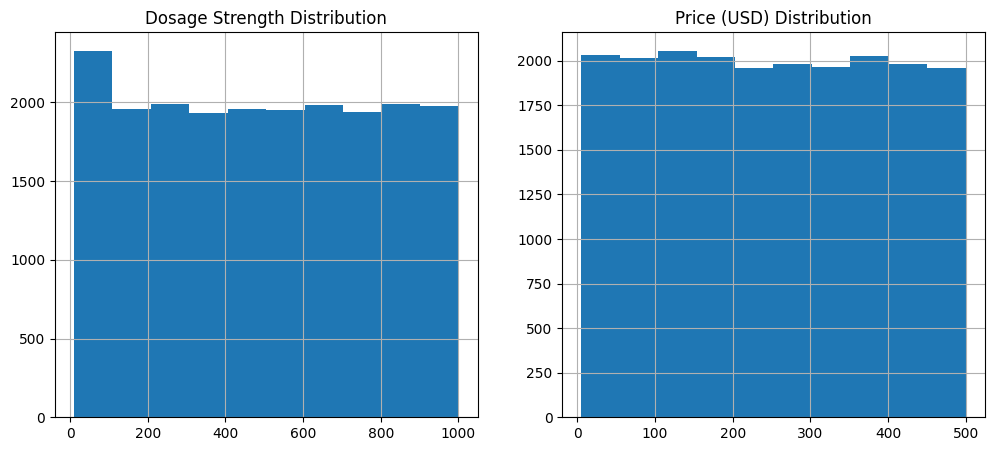

In [18]:
import matplotlib.pyplot as plt

# Summary statistics
print(df[['Dosage Strength Numeric', 'Approval Year', 'Price (USD)']].describe())

# Distribution plots
fig, axs = plt.subplots(1, 2, figsize=(12,5))
df['Dosage Strength Numeric'].hist(ax=axs[0])
axs[0].set_title('Dosage Strength Distribution')
df['Price (USD)'].hist(ax=axs[1])
axs[1].set_title('Price (USD) Distribution')
plt.show()


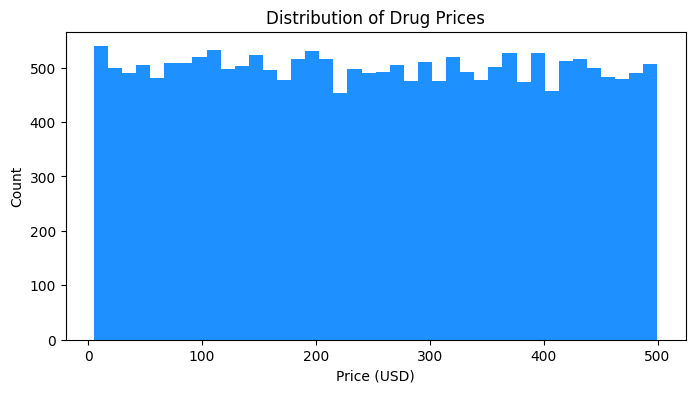

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['Price (USD)'].hist(bins=40, color='dodgerblue');
plt.title('Distribution of Drug Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.grid(False)
plt.show()


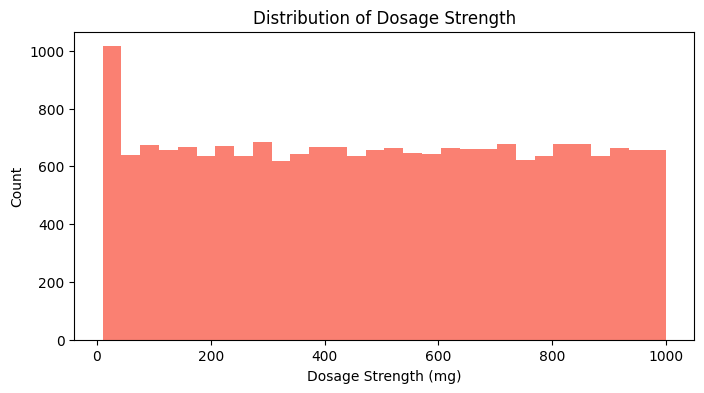

In [20]:
plt.figure(figsize=(8,4))
df['Dosage Strength Numeric'].hist(bins=30, color='salmon');
plt.title('Distribution of Dosage Strength')
plt.xlabel('Dosage Strength (mg)')
plt.ylabel('Count')
plt.grid(False)
plt.show()


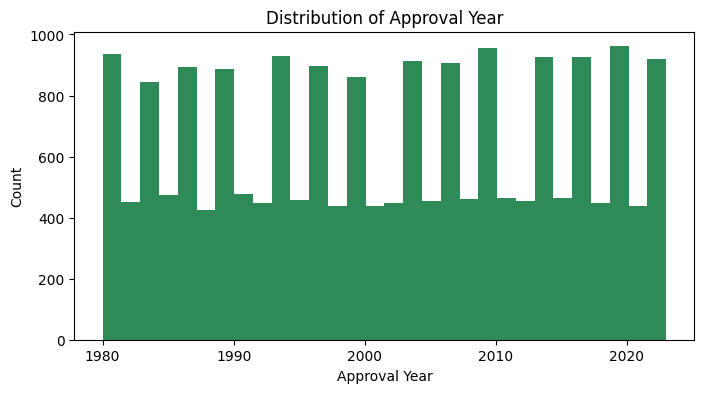

In [21]:
plt.figure(figsize=(8,4))
df['Approval Year'].hist(bins=30, color='seagreen');
plt.title('Distribution of Approval Year')
plt.xlabel('Approval Year')
plt.ylabel('Count')
plt.grid(False)
plt.show()


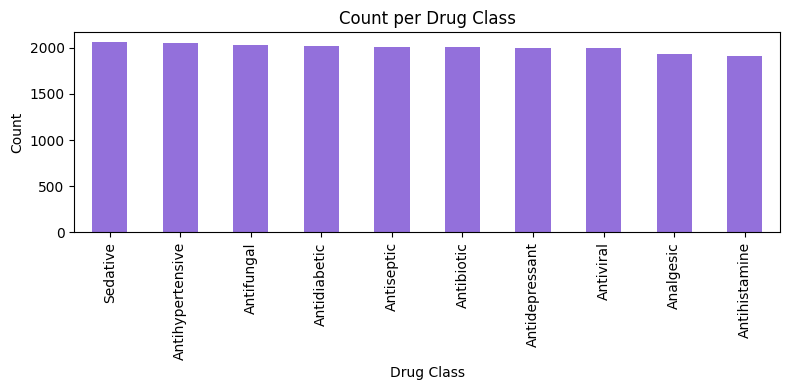

In [22]:
df['Drug Class'].value_counts().plot(kind='bar', color='mediumpurple', figsize=(8,4))
plt.title('Count per Drug Class')
plt.xlabel('Drug Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

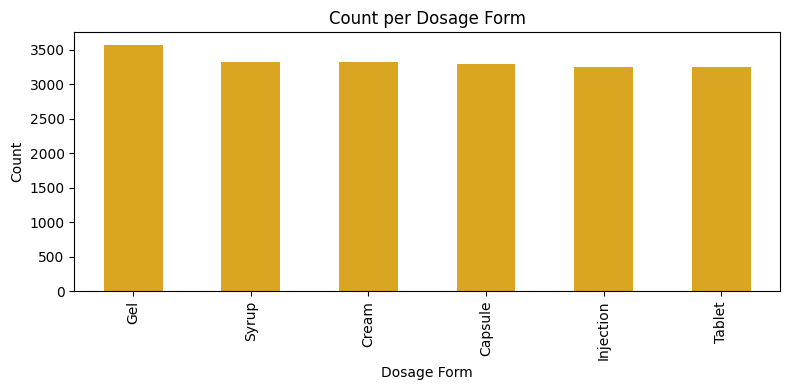

In [23]:
df['Dosage Form'].value_counts().plot(kind='bar', color='goldenrod', figsize=(8,4))
plt.title('Count per Dosage Form')
plt.xlabel('Dosage Form')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


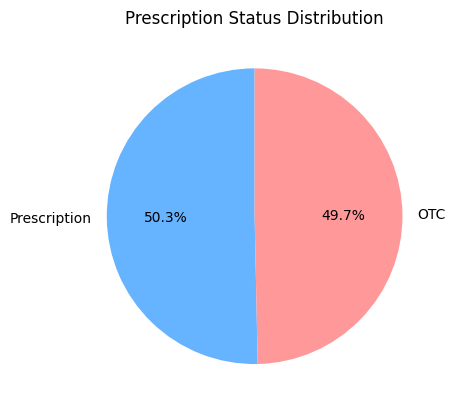

In [24]:
df['Prescription Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Prescription Status Distribution')
plt.ylabel('')
plt.show()


<Figure size 1200x600 with 0 Axes>

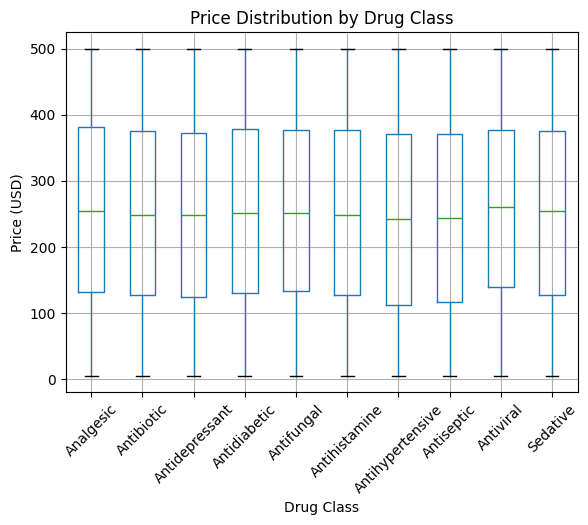

In [25]:
plt.figure(figsize=(12,6))
df.boxplot(column='Price (USD)', by='Drug Class', showfliers=False)
plt.title('Price Distribution by Drug Class')
plt.suptitle('')
plt.xlabel('Drug Class')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x500 with 0 Axes>

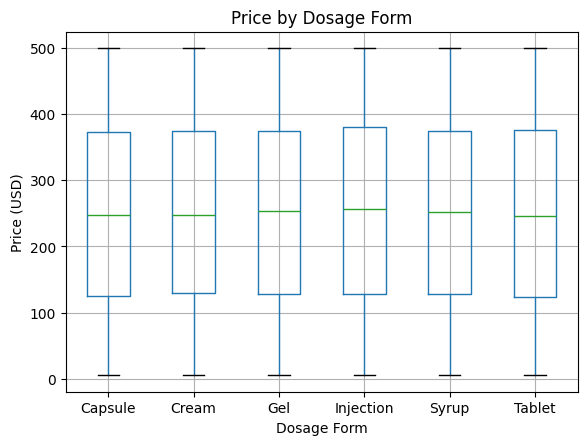

In [26]:
plt.figure(figsize=(10,5))
df.boxplot(column='Price (USD)', by='Dosage Form', showfliers=False)
plt.title('Price by Dosage Form')
plt.suptitle('')
plt.xlabel('Dosage Form')
plt.ylabel('Price (USD)')
plt.show()


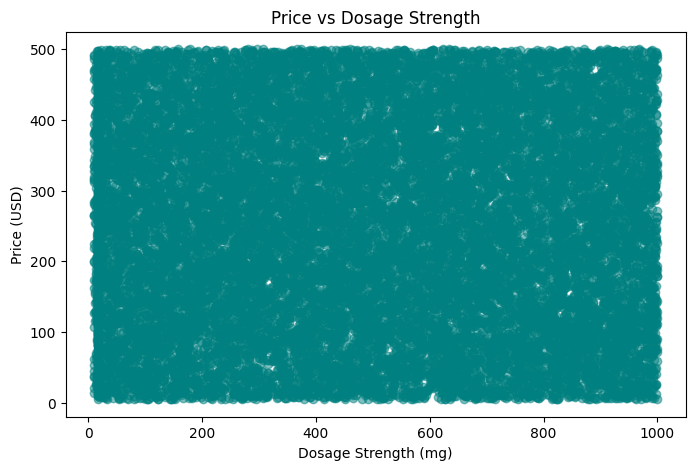

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(df['Dosage Strength Numeric'], df['Price (USD)'], alpha=0.5, color='teal')
plt.title('Price vs Dosage Strength')
plt.xlabel('Dosage Strength (mg)')
plt.ylabel('Price (USD)')
plt.show()


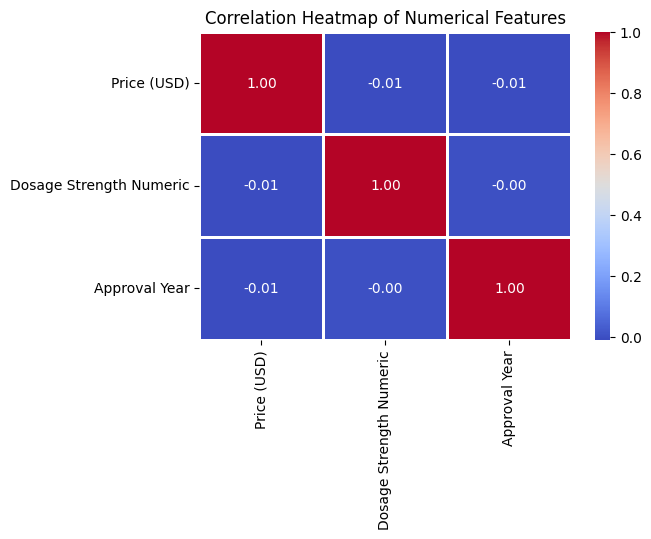

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns
num_cols = ['Price (USD)', 'Dosage Strength Numeric', 'Approval Year']

# Compute the correlation matrix
corr = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [29]:
for col in ['Side Effects', 'Description']:
    df[f'{col} Char Length'] = df[col].apply(lambda x: len(str(x)))
    df[f'{col} Word Count'] = df[col].apply(lambda x: len(str(x).split()))

print(df[[
    'Side Effects Char Length', 'Side Effects Word Count',
    'Description Char Length', 'Description Word Count'
]].describe())


       Side Effects Char Length  Side Effects Word Count  \
count              20000.000000             20000.000000   
mean                  19.643450                 2.331850   
std                    9.268345                 1.054505   
min                    6.000000                 1.000000   
25%                   10.000000                 1.000000   
50%                   19.000000                 2.000000   
75%                   28.000000                 3.000000   
max                   36.000000                 4.000000   

       Description Char Length  Description Word Count  
count             20000.000000             20000.00000  
mean                 37.814900                 5.80400  
std                   4.779475                 0.60622  
min                  29.000000                 5.00000  
25%                  34.000000                 5.00000  
50%                  37.000000                 6.00000  
75%                  41.000000                 6.00000  
max

In [30]:
from collections import Counter
import re

# Most common words in Side Effects
all_side_effects_words = ' '.join(df['Side Effects'].dropna()).lower()
words = re.findall(r'\w+', all_side_effects_words)
common_words_side_effects = Counter(words).most_common(20)
print("Most common words in Side Effects:")
for word, count in common_words_side_effects:
    print(word, count)

# Most common words in Description
all_descriptions = ' '.join(df['Description'].dropna()).lower()
words_desc = re.findall(r'\w+', all_descriptions)
common_words_description = Counter(words_desc).most_common(20)
print("\nMost common words in Description:")
for word, count in common_words_description:
    print(word, count)


Most common words in Side Effects:
fatigue 6766
nausea 6717
drowsiness 6642
stomach 6640
upset 6640
headache 6617
dizziness 6615

Most common words in Description:
a 20000
used 20000
for 20000
relief 4011
infection 4001
blood 2099
pressure 2099
control 2099
sedative 2062
diabetes 2061
antihypertensive 2049
antifungal 2032
wound 2028
cleaning 2028
allergy 2024
antidiabetic 2015
antiseptic 2008
antibiotic 2007
antidepressant 1999
fungal 1996


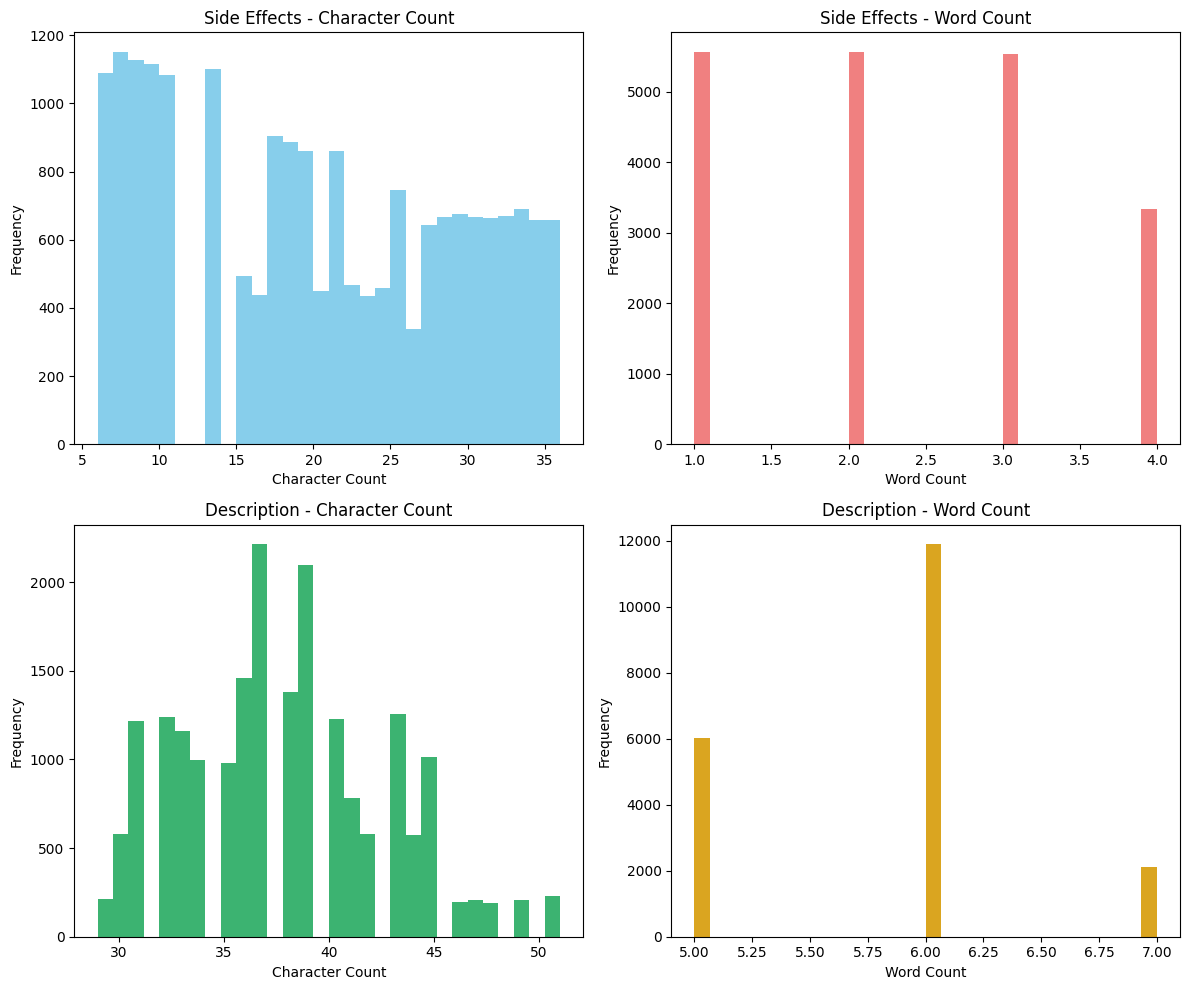

In [31]:
import matplotlib.pyplot as plt

# Calculate character and word counts for each text column
for col in ['Side Effects', 'Description']:
    df[f'{col} Char Length'] = df[col].apply(lambda x: len(str(x)))
    df[f'{col} Word Count'] = df[col].apply(lambda x: len(str(x).split()))

# Plot histograms
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.hist(df['Side Effects Char Length'], bins=30, color='skyblue')
plt.title('Side Effects - Character Count')
plt.xlabel('Character Count'); plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(df['Side Effects Word Count'], bins=30, color='lightcoral')
plt.title('Side Effects - Word Count')
plt.xlabel('Word Count'); plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(df['Description Char Length'], bins=30, color='mediumseagreen')
plt.title('Description - Character Count')
plt.xlabel('Character Count'); plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(df['Description Word Count'], bins=30, color='goldenrod')
plt.title('Description - Word Count')
plt.xlabel('Word Count'); plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


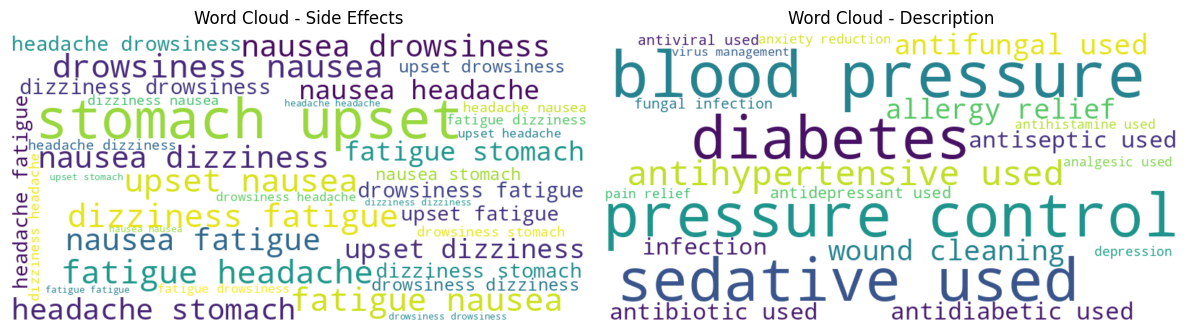

In [33]:
!pip install wordcloud
from wordcloud import WordCloud

# Generate word clouds
wc_se = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Side Effects'].dropna()).lower())
wc_desc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Description'].dropna()).lower())

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(wc_se, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Side Effects')
plt.subplot(1,2,2)
plt.imshow(wc_desc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Description')
plt.tight_layout()
plt.show()


In [34]:
print(df['Side Effects'].dropna().head(10))  # See a sample


0    Fatigue, Drowsiness, Stomach Upset
1                                Nausea
2                     Headache, Fatigue
3       Stomach Upset, Nausea, Headache
4                  Headache, Drowsiness
5                               Fatigue
6    Headache, Dizziness, Stomach Upset
7      Fatigue, Stomach Upset, Headache
8                               Fatigue
9                    Dizziness, Fatigue
Name: Side Effects, dtype: object


In [37]:
import numpy as np
print(df['Side Effects'].str.strip().replace('', np.nan).dropna().head(10))


0    Fatigue, Drowsiness, Stomach Upset
1                                Nausea
2                     Headache, Fatigue
3       Stomach Upset, Nausea, Headache
4                  Headache, Drowsiness
5                               Fatigue
6    Headache, Dizziness, Stomach Upset
7      Fatigue, Stomach Upset, Headache
8                               Fatigue
9                    Dizziness, Fatigue
Name: Side Effects, dtype: object


/tmp/ipython-input-38-885261749.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(words_se, rotation=45, ha='right')
/tmp/ipython-input-38-885261749.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(words_desc, rotation=45, ha='right')


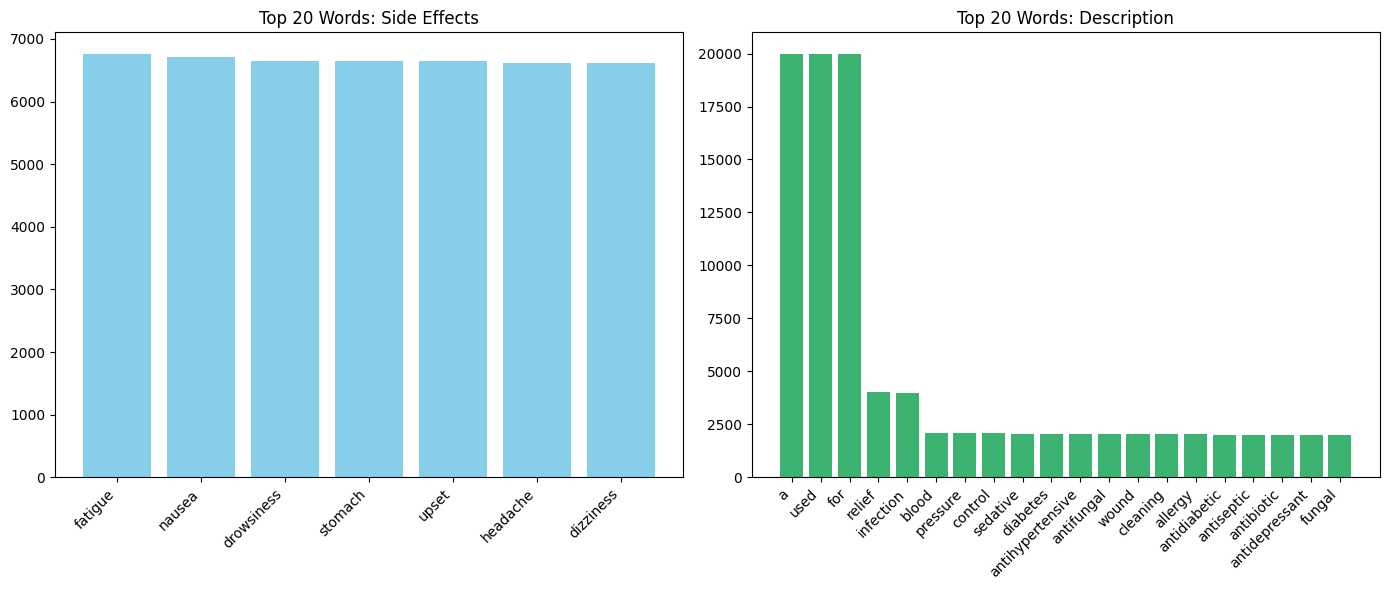

In [38]:
from collections import Counter
import re

def get_most_common_words(text_series, num_words=20):
    words = []
    for txt in text_series.dropna():
        words += re.findall(r'\w+', str(txt).lower())
    if not words:
        return []
    return Counter(words).most_common(num_words)

side_effects_words = get_most_common_words(df['Side Effects'])
desc_words = get_most_common_words(df['Description'])

# Safe unpack: only if list is not empty
if side_effects_words:
    words_se, counts_se = zip(*side_effects_words)
else:
    words_se, counts_se = [], []

if desc_words:
    words_desc, counts_desc = zip(*desc_words)
else:
    words_desc, counts_desc = [], []

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

if words_se:
    axs[0].bar(words_se, counts_se, color='skyblue')
    axs[0].set_title('Top 20 Words: Side Effects')
    axs[0].set_xticklabels(words_se, rotation=45, ha='right')
else:
    axs[0].text(0.5, 0.5, "No words found", ha='center', va='center', fontsize=12)
    axs[0].set_title('Top 20 Words: Side Effects')
    axs[0].set_xticks([])

if words_desc:
    axs[1].bar(words_desc, counts_desc, color='mediumseagreen')
    axs[1].set_title('Top 20 Words: Description')
    axs[1].set_xticklabels(words_desc, rotation=45, ha='right')
else:
    axs[1].text(0.5, 0.5, "No words found", ha='center', va='center', fontsize=12)
    axs[1].set_title('Top 20 Words: Description')
    axs[1].set_xticks([])

plt.tight_layout()
plt.show()


5. Feature Engineering

In [39]:
import pandas as pd
# Categorical columns to encode
categorical_cols = ['Drug Class', 'Indication', 'Dosage Form', 'Prescription Status']
# Apply one-hot encoding
df_model = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_model['Market Status Encoded'] = le.fit_transform(df['Market Status'])


In [70]:
df['Drug Age'] = 2025 - df['Approval Year']
df['Side Effect Count'] = (
    df['Side Effects'].apply(lambda x: len([effect for effect in str(x).split(',') if effect.strip()]))
)


In [75]:
df.head(2)

,Drug Name,Drug Class,Indication,Side Effects,Dosage Form,Dosage Strength,Prescription Status,Manufacturer,Approval Year,Description,Price (USD),Market Status,Dosage Strength Numeric,Side Effects Char Length,Side Effects Word Count,Description Char Length,Description Word Count,Drug Age,Side Effect Count
0,Drug-7690,Antiviral,Wound Cleaning,"Fatigue, Drowsiness, Stomach Upset",Gel,356 mg,Prescription,BioSynth,2021,A antiviral used for wound cleaning.,414.14,Discontinued,356,34,4,36,6,4,3
1,Drug-2191,Sedative,Anxiety Reduction,Nausea,Injection,375 mg,Prescription,PharmaCorp,2009,A sedative used for anxiety reduction.,388.12,Active,375,6,1,38,6,16,1


In [59]:
X = df_model.drop(
    columns=['Drug Name', 'Price (USD)', 'Market Status', 'Side Effects', 'Description', 'Dosage Strength', 'Manufacturer'],
    errors='ignore'
)
y = df_model['Price (USD)']


In [63]:
print(y.dtypes)

float64


In [60]:
print(X.dtypes)  # All should be int or float
print(y.dtypes)

Approval Year                        int64
Dosage Strength Numeric              int64
Side Effects Char Length             int64
Side Effects Word Count              int64
Description Char Length              int64
Description Word Count               int64
Drug Class_Antibiotic                 bool
Drug Class_Antidepressant             bool
Drug Class_Antidiabetic               bool
Drug Class_Antifungal                 bool
Drug Class_Antihistamine              bool
Drug Class_Antihypertensive           bool
Drug Class_Antiseptic                 bool
Drug Class_Antiviral                  bool
Drug Class_Sedative                   bool
Indication_Anxiety Reduction          bool
Indication_Blood Pressure Control     bool
Indication_Depression                 bool
Indication_Diabetes                   bool
Indication_Fungal Infection           bool
Indication_Infection                  bool
Indication_Pain Relief                bool
Indication_Virus Management           bool
Indication_

6. Model Building

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVR', SVR())

]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, rmse, r2))

# Show results as table
import pandas as pd
results_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "RMSE", "R²"]
).sort_values("RMSE")
print(results_df)


               Model         MAE        RMSE        R²
2   Lasso Regression  124.578107  143.625041 -0.000197
6                SVR  124.604356  143.656647 -0.000637
1   Ridge Regression  124.607277  143.661959 -0.000711
0  Linear Regression  124.607422  143.662079 -0.000713
5  Gradient Boosting  124.875648  144.011329 -0.005585
4      Random Forest  126.899417  147.275860 -0.051692
3      Decision Tree  169.000495  205.809062 -1.053782


7. Predicting their Market Status

In [81]:
df['Market Status Encoded'] = df['Market Status'].map({'Active': 1, 'Discontinued': 0})


In [82]:
X = df[categorical_cols + numeric_cols + [text_col]]
y = df['Market Status Encoded']


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVC', SVC())
]


In [85]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

results = []

for name, estimator in models:
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', estimator)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    results.append((name, acc, f1, prec, rec))

results_df = pd.DataFrame(
    results, columns=["Model", "Accuracy", "F1", "Precision", "Recall"]
).sort_values("Accuracy", ascending=False).reset_index(drop=True)

print(results_df)


                 Model  Accuracy        F1  Precision    Recall
0    Gradient Boosting   0.51225  0.528630   0.513374  0.544821
1        Decision Tree   0.50250  0.502500   0.504518  0.500498
2        Random Forest   0.50200  0.490276   0.504211  0.477092
3                  SVC   0.50200  0.668442   0.502000  1.000000
4  Logistic Regression   0.49500  0.510184   0.497164  0.523904


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# 'preprocessor' should be your already-defined ColumnTransformer
classification_pipe = Pipeline([
    ('pre', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

classification_pipe.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Drug Class', 'Indication',
                                                   'Dosage Form',
                                                   'Prescription Status']),
                                                 ('num', 'passthrough',
                                                  ['Dosage Strength Numeric',
                                                   'Approval Year', 'Drug Age',
                                                   'Side Effect Count']),
                                                 ('tfidf',
                                                  TfidfVectorizer(max_features=25),
                                                  'Side Effects')])),
                ('model', RandomForestClassifier(random_state=42))])

In [90]:
y_pred = classification_pipe.predict(X_test)


In [91]:
y_pred_proba = classification_pipe.predict_proba(X_test)[:, 1]  # Probability of 'Active'


In [92]:
# Select sample rows from your test set
sample_X = X_test.iloc[:5]

# Predict class and probability
sample_pred = classification_pipe.predict(sample_X)
sample_proba = classification_pipe.predict_proba(sample_X)[:, 1]

# Print alongside actual values
sample_results = sample_X.copy()
sample_results['Actual Market Status'] = y_test.iloc[:5].map({1: 'Active', 0: 'Discontinued'}).values
sample_results['Predicted Market Status'] = pd.Series(sample_pred).map({1: 'Active', 0: 'Discontinued'}).values
sample_results['Active Probability'] = sample_proba

print(sample_results[['Drug Class', 'Dosage Form', 'Actual Market Status', 'Predicted Market Status', 'Active Probability']])


             Drug Class Dosage Form Actual Market Status  \
9587         Antifungal     Capsule               Active   
15308  Antihypertensive      Tablet         Discontinued   
19614    Antidepressant       Cream         Discontinued   
11456      Antidiabetic       Cream               Active   
9388           Sedative       Syrup         Discontinued   

      Predicted Market Status  Active Probability  
9587                   Active                0.59  
15308                  Active                0.59  
19614            Discontinued                0.44  
11456                  Active                0.51  
9388                   Active                0.62  
